In [82]:
import nltk
import os
import sys
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import string
from collections import defaultdict
from nltk.stem.snowball import EnglishStemmer
import re
from collections import Counter, OrderedDict
from tqdm import tqdm_gui,tqdm
import numpy as np
import matplotlib.pyplot as plt
import linecache
import csv
import unidecode

## Pegando os textos

In [83]:
textos = []
for p, d, f in tqdm(os.walk(r'raw.en')):
    #print( p,d,f)
    if f:
        for fileid  in f:
            with open(os.path.join(p,fileid),'rb') as g:
                textos.append(g.read())


0it [00:00, ?it/s]
1it [00:03,  3.85s/it]


In [3]:
textos_txt = []
for txt in tqdm(textos):
    textos_txt.append(txt.decode('latin-1'))
textos = []

100%|██████████| 164/164 [00:01<00:00, 109.49it/s]


In [69]:
with open("write.txt",'wb') as g:
    for p, d, f in os.walk(r'raw.en'):
        #print( p,d,f)
        if f:
            for fileid  in tqdm(f):
                with open("raw.en/"+fileid,'rb') as f:
                    for line in f:
                        g.write(line[:-1])
                        if line == b'ENDOFARTICLE.\n':
                            g.write(b'\n')

100%|██████████| 164/164 [00:22<00:00,  7.28it/s]


In [146]:
with open("write.txt",'w') as g:
     with open("raw.en/englishText_520000_530000",'rb') as f:
                    for line in f:
                        g.write(unidecode.unidecode(re.sub(r'[^\w]', ' ',line[:-1].decode('latin-1')).lower()))
                        if line == b'ENDOFARTICLE.\n':
                            g.write('\n')

In [99]:
with open("write.txt",'r') as g:
    for line in g:
        print(line.lower())
        break

 doc id  4356224  title  sweet valley senior year  nonfiltered  1  processed  1  dbindex  520001  sweet valley senior year is part of the sweet valley high franchise and the last spin off series to be published  a double edition of the final book  sweet 18  included the first book from the svh series  double love  and a letter from creator francine pascal   the series is considered the most contemporary and realistic of the franchise  the senior year series continued the earthquake plot that took place in the final sweet valley high books  notably that the earthquake destroyed nearby el carro high  as a result  el carro students were forced to transfer to sweet valley high like the sweet valley junior high series  the chapters are interset with  handwritten  diary pages  e mail entries and similar that explore the characters thoughts  off screen  returning characters elizabeth wakefield elizabeth became more outgoing as the series progressed  though still a member of the oracle  she ex

In [97]:
re.sub(r'[^\w]', ' ',line).lower()

' doc id  4356224  title  sweet valley senior year  nonfiltered  1  processed  1  dbindex  520001  sweet valley senior year is part of the sweet valley high franchise and the last spin off series to be published  a double edition of the final book  sweet 18  included the first book from the svh series  double love  and a letter from creator francine pascal   the series is considered the most contemporary and realistic of the franchise  the senior year series continued the earthquake plot that took place in the final sweet valley high books  notably that the earthquake destroyed nearby el carro high  as a result  el carro students were forced to transfer to sweet valley high like the sweet valley junior high series  the chapters are interset with  handwritten  diary pages  e mail entries and similar that explore the characters thoughts  off screen  returning characters elizabeth wakefield elizabeth became more outgoing as the series progressed  though still a member of the oracle  she e

In [14]:
titles = []
with open("raw.en/englishText_520000_530000",'rb') as g:
    for line in tqdm(g):
        if line[0:4] == b'<doc':
            i = 0
            while line[i:i+6]!= b'title=':
                i += 1
            j = i
            while line[j:j+3]!= b'non':
                j += 1
            titles.append(line[i+7:j-2])

118565it [00:00, 1378086.45it/s]


In [111]:
titles

[b'Sweet Valley Senior Year',
 b'Growing pains (book)',
 b'Giuseppe Simone Assemani',
 b'To Live Forever',
 b'Subring',
 b'Hospital Radio Tunbridge Wells',
 b'Milltown Cemetery attack',
 b'Pabst Mansion',
 b'Monetary policy of Sweden',
 b'Rookwood pottery',
 b'Anwar Superstar',
 b'Tipperary',
 b'Running the Halls',
 b'N?b? Characters - School Staff',
 b'List of incinerators in the UK',
 b'Mario Golf (Nintendo 64)',
 b'Civil Resistance',
 b'Minnehaha',
 b'Charango',
 b'List of United States Representatives from Idaho',
 b'Robert Arbuthnot (disambiguation)',
 b'Brainiac CPU',
 b'Bibliography of Sathya Sai Baba',
 b'Joe Magarac',
 b'Water of Life (Dune)',
 b'Kundalika River',
 b'Web communication',
 b'Stockholm Mosque',
 b'Dysart, County Roscommon',
 b'Jeoldu-san',
 b'Howard Grubb',
 b'Textile art',
 b'List of political parties in the Republic of Ireland',
 b'Barra do Ouro',
 b'Lumina z34',
 b'James Young',
 b'The Castles of Dr. Creep',
 b'Charles Bloom Secondary School',
 b'Caryn Richman

In [125]:
with open("titles.txt",'w') as g:
    for i in titles:
        g.write(i.decode("latin-1"))
        g.write('\n')

In [122]:
titles[0].decode("latin-1")

'Sweet Valley Senior Year'

In [147]:
with open("write.txt",'r') as g:
    for line in g:
        for i in line:
            if ord(i) > 128:
                print((i,ord(i)))

In [144]:
unaccented_string = unidecode.unidecode("çãs asdsfà")

In [145]:
unaccented_string

'cas asdsfa'

In [148]:
len(titles)

3049

In [ ]:
2452

In [152]:
j = 0
with open("write.txt",'r') as g:
    for line in g:
        if j == 107:
            print(line)
        j += 1

  doc  doc id  457583  title  phi phi islands  nonfiltered  109  processed  108  dbindex  520110  the phi phi islands     are located in thailand  between the large island of phuket and the western andaman sea cost of the mainland  phi phi don  the larger and principal of the two phi phi islands  is located at    both phi phi don  and phi phi leh  the smaller  are administratively part of krabi province  most of which is on the mainland  and is located at  ko phi phi don   ko     meaning  island  in the thai language  is the largest island of the group  and is the only island with permanent inhabitants  although the beaches of the second largest island  ko phi phi lee  or  ko phi phi leh    are visited by many people as well  there are no accommodation facilities on this island  but it is just a short boat ride from ko phi phi don  the rest of the islands in the group  including bida nok  bida noi  and bamboo island  are not much more than large limestone rocks jutting out of the sea p

In [6]:
print(textos[0][0:1000])

b'<doc id="4356224" title="Sweet Valley Senior Year" nonfiltered="1" processed="1" dbindex="520001">\nSweet Valley Senior Year is part of the Sweet Valley High franchise and the last spin-off series to be published. A double edition of the final book, Sweet 18, included the first book from the SVH series, Double Love, and a letter from creator Francine Pascal.  The series is considered the most contemporary and realistic of the franchise .\n\nThe Senior Year series continued the earthquake plot that took place in the final Sweet Valley High books, notably that the earthquake destroyed nearby El Carro High. As a result, El Carro students were forced to transfer to Sweet Valley High.\n\nLike the Sweet Valley Junior High series, the chapters are interset with "handwritten" diary pages, e-mail entries and similar that explore the characters thoughts "off screen".\n\nReturning Characters.\n\n\n\nElizabeth Wakefield.\nElizabeth became more outgoing as the series progressed. Though still a me

In [79]:
ids_titulos = []
with open("raw.en/englishText_520000_530000",'rb') as g:
    for line in tqdm(g):
        if line[0:4] == b'<doc':
            i = 0
            while line[i:i+3]!= b'id=':
                i += 1
            j = i
            while line[j:j+3]!= b'tit':
                j += 1
            k = 0
            while line[k:k+6]!= b'title=':
                k += 1
            l = k
            while line[l:l+3]!= b'non':
                l += 1
            ids_titulos.append((int(line[i+4:j-2]),line[k+7:l-2]))

376990it [00:00, 1402941.67it/s]


In [19]:
ids_titulos = sorted(ids_titulos, key=lambda tup: tup[0])

In [21]:
len(ids_titulos)

3049

In [80]:
ids_txts = []
with open("raw.en/englishText_520000_530000",'rb') as g:
    for line in tqdm(g):
        if line[0:4] == b'<doc':
            i = 0
            while line[i:i+3]!= b'id=':
                i += 1
            j = i
            while line[j:j+3]!= b'tit':
                j += 1
            k = 0
            while line[k:k+3]!= b'>\n':
                k += 1
            l = k
            while line[l:l+14]!= b'ENDOFARTICLE.\n':
                l += 1
            ids_txts.append((int(line[i+4:j-2]),line[k+4:l+14]))

0it [00:00, ?it/s]

b'>\n'
b'\n'
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''

b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''
b''


KeyboardInterrupt: 

In [81]:
ids_txts = []
def out(textos , ids_txts):
    i = 0
    n = 0
    for q in range(len(textos[0])):
        n += 1
        if n%500 == 0: print(n)
        while textos[0][i:i+3]!= b'id=':
            i += 1
        j = i
        while textos[0][j:j+3]!= b'tit':
            j += 1
        k = j
        while textos[0][k:k+3]!= b'">\n':
            k += 1
        l = k
        while textos[0][l:l+14]!= b'ENDOFARTICLE.\n':
            l += 1
        ids_txts.append((int(textos[0][i+4:j-2]),textos[0][k+4:l+14]))
        i = l + 14

        
out(textos, ids_txts)

500
1000
1500
2000
2500
3000


KeyboardInterrupt: 

In [77]:
len(ids_txts)

7979

In [22]:
len(ids_titulos)

3049

In [26]:
ids_txts = sorted(ids_txts, key=lambda tup: tup[0])

In [32]:
ids_txts[-2:]

[(9379252,
  b"\nDr. Charles L. Harper, Jr., is Senior Vice President of the John Templeton Foundation. His primary responsibilities are in the areas of strategic planning, program design and development (at a level of about $20 million per annum), vision casting, and worldwide talent scouting in areas relevant to the Foundation's activities. Dr. Harper has created more than $100 million in new grant-based research programs ranging widely from the study of forgiveness and reconciliation to projects focused on foundational questions in physics and cosmology, including topics in chemistry, neuroscience, evolutionary biology, medicine, and the philosophy of science. He also covers the Foundation's portfolio in the area of research and public education on enterprise-based solutions to poverty and has created a number of large programs in this area. In addition, Dr. Harper was Founding Chairman of the innovative philanthropic organization Geneva Global Inc., which is transforming grant maki

In [50]:
i = 0
while ids_titulos[i][0] == ids_txts[i][0]:
    i += 1

IndexError: list index out of range

In [35]:
ids_titulos[0][0]

1435

In [57]:
ids_titulos[i-1]

(5986068, b'Adaptive dynamics')

In [151]:
ids_txts = []
with open("raw.en/englishText_520000_530000",'rb') as g:
    i = -1
    for line in tqdm(g):
        if line[0:4] == b'<doc':
            i += 1
            ids_txts.append([])    
        ids_txts[i].append(line.decode("latin-1"))   


118565it [00:00, 1352785.98it/s]


In [152]:
for i in range(len(ids_txts)):
    ids_txts[i] = ''.join(ids_txts[i][:])

In [111]:
def get_title(string):                  ##function to get title from title lines
    begin = string.find("title")
    end = string.find("nonfiltered")
    if begin == -1 or end == -1: return None
    title = string[begin+7:end - 2]
    return title

In [124]:
get_title(''.join(ids_txts[-1][]))

'5509333'

In [125]:
def get_id(string):                  ##function to get title from title lines
    begin = string.find("id")
    end = string.find("title")
    if begin == -1 or end == -1: return None
    title = string[begin+4:end - 2]
    return title

In [162]:
print(ids_txts[0])

<doc id="4356224" title="Sweet Valley Senior Year" nonfiltered="1" processed="1" dbindex="520001">
Sweet Valley Senior Year is part of the Sweet Valley High franchise and the last spin-off series to be published. A double edition of the final book, Sweet 18, included the first book from the SVH series, Double Love, and a letter from creator Francine Pascal.  The series is considered the most contemporary and realistic of the franchise .

The Senior Year series continued the earthquake plot that took place in the final Sweet Valley High books, notably that the earthquake destroyed nearby El Carro High. As a result, El Carro students were forced to transfer to Sweet Valley High.

Like the Sweet Valley Junior High series, the chapters are interset with "handwritten" diary pages, e-mail entries and similar that explore the characters thoughts "off screen".

Returning Characters.



Elizabeth Wakefield.
Elizabeth became more outgoing as the series progressed. Though still a member of The Or

In [157]:
''.join(ids_txts[-1][:])

'<doc id="5509333" title="Lisa Garland" nonfiltered="3073" processed="3049" dbindex="523118">\n\n\nLisa Garland is a fictional secondary character in the first installment of the Silent Hill video game series.  Some of Lisa\'s history is left to the gamer to surmise, since they only learn as much as the protagonist (Harry) knows.  \n\nBio.\n\nLisa Garland was a nurse who worked at Alchemilla Hospital. Like many of the members of the hospital staff, she was addicted to PTV, a drug being dealt by the hospital\'s administrator, Dr. Michael Kaufmann, and Silent Hill\'s resident cult, The Order. Because of her addiction she had little choice but to follow through with every request made by Dr. Kauffman, under threat of him cutting off her supply.  \n\nOne of the duties Lisa had to perform was taking care of the comatose Alessa Gillespie, whose body was covered in wounds which would not heal, and were always oozing blood and pus, requiring frequent bandaging.  Lisa could not understand what 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sbn

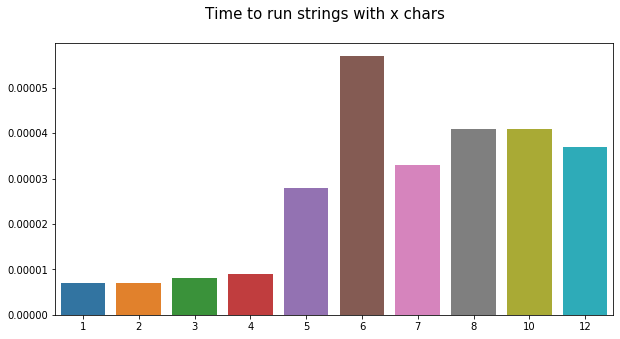

In [49]:
ind = [1,2,3,4,5,6,7,8,10,12]
time = [7e-6, 7e-6, 8e-6,9e-6, 2.8e-5,5.7e-5,3.3e-5,4.1e-5,4.1e-5,3.7e-5]
fig = plt.figure(figsize=(10, 5))
sbn.barplot(ind,time)
fig.suptitle('Time to run strings with x chars', fontsize=15)
plt.xlabel = "oi"

In [20]:
x = [1,2,3,4,5,6]
y = [2.3e-5, 0.0106, 0.0127, 0.001, 0.53, 0.222]

Text(0.5, 0.98, 'Time to run x strings in a boolean search')

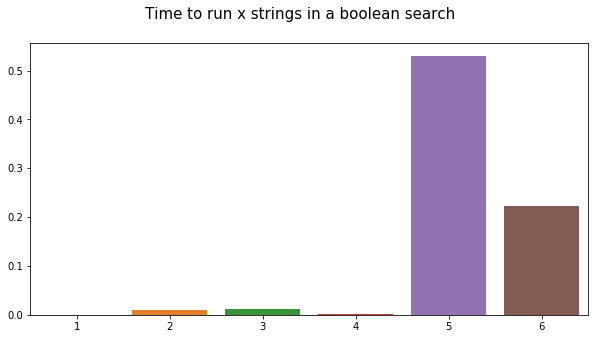

In [47]:
fig = plt.figure(figsize=(10, 5))
sbn.barplot(x,y)
fig.suptitle('Time to run x strings in a boolean search', fontsize=15)